<a href="https://www.kaggle.com/code/yorkyong/exploratory-data-analysis-traffic-volume?scriptVersionId=156786086" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
# pd.set_option('max_columns', 200)

In [2]:
df = pd.read_csv('/kaggle/input/traffic-volume/Metro_Interstate_Traffic_Volume_train.csv')

# **Step1: Understanding the Data**

In [3]:
df.shape

(40255, 14)

In [4]:
df.head(5)

,Unnamed: 0,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,year,month,day,hour,traffic_volume
0,0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,2012,10,2,09:00,5545
1,1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,2012,10,2,10:00,4516
2,2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,2012,10,2,11:00,4767
3,3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,2012,10,2,12:00,5026
4,4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,2012,10,2,13:00,4918


In [5]:
df.columns

Index(['Unnamed: 0', 'holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'date_time', 'year', 'month',
       'day', 'hour', 'traffic_volume'],
      dtype='object')

In [6]:
df.dtypes

Unnamed: 0               int64
holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
year                     int64
month                    int64
day                      int64
hour                    object
traffic_volume           int64
dtype: object

**Attributes description**
* holiday: Categorical US National holidays plus regional holiday, Minnesota State Fair.
* temp: Numeric Average temperature in kelvin.
* rain 1h: Numeric Amount in mm of rain that occurred in the hour.
* snow 1h: Numeric Amount in mm of snow that occurred in the hour.
* clouds all: Numeric Percentage of cloud cover.
* weather main: Categorical Short textual description of the current weather.
* weather description: Categorical Longer textual description of the current weather
* date time: DateTime Hour of the data collected in local CST time.
* year: Year as integer extracted from the date.
* month: Month as integer extracted from the date.
* day: Day as integer extracted from the date.
* hour: time of instance extracted
* traffic volume: Numeric Hourly I-94 ATR 301 reported westbound traffic volume (target variable).

In [7]:
df.describe()

,Unnamed: 0,temp,rain_1h,snow_1h,clouds_all,year,month,day,traffic_volume
count,40255.00000,40255.000000,40255.000000,40255.000000,40255.000000,40255.000000,40255.000000,40255.000000,40255.000000
mean,20127.00000,280.880914,0.376225,0.000266,50.111464,2015.021215,6.788523,15.741697,3259.760303
std,11620.76188,13.229418,49.011416,0.008937,38.883863,1.681899,3.468598,8.720744,1989.592608
min,0.00000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000,1.000000,0.000000
25%,10063.50000,272.325000,0.000000,0.000000,1.000000,2013.000000,4.000000,8.000000,1190.000000
50%,20127.00000,281.800000,0.000000,0.000000,64.000000,2015.000000,7.000000,16.000000,3375.000000
75%,30190.50000,291.250000,0.000000,0.000000,90.000000,2017.000000,10.000000,23.000000,4938.000000
max,40254.00000,308.240000,9831.300000,0.510000,100.000000,2017.000000,12.000000,31.000000,7280.000000


In [8]:
#shows as well for non-numeric fields
df.describe(include=['O'])

,holiday,weather_main,weather_description,date_time,hour
count,51,40255,40255,40255,40255
unique,11,11,38,34042,24
top,Thanksgiving Day,Clouds,sky is clear,2013-04-18 22:00:00,04:00
freq,6,13167,9350,6,1748


In [9]:
#Unnamed is probably an index in the table we can drop
#some data of temp with 0.00 Kelvin which is not possible an probably a datapoint to treat in data preparation


# **Step 2: Data Preparation**

In [10]:
#looks like we just need to drop the Unnamed column for the time being

df = df[[#'Unnamed: 0',
        'holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'date_time', 'year', 'month',
       'day', 
        #'hour', 
        'traffic_volume']].copy()
      

In [11]:
df['date_time'] = pd.to_datetime(df['date_time'])
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,year,month,day,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,2012,10,2,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,2012,10,2,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,2012,10,2,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,2012,10,2,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,2012,10,2,4918
...,...,...,...,...,...,...,...,...,...,...,...,...
40250,NaN,249.84,0.0,0.0,1,Clear,sky is clear,2017-12-31 19:00:00,2017,12,31,2995
40251,NaN,249.79,0.0,0.0,5,Clear,sky is clear,2017-12-31 20:00:00,2017,12,31,2731
40252,NaN,249.61,0.0,0.0,5,Clear,sky is clear,2017-12-31 21:00:00,2017,12,31,2483
40253,NaN,249.50,0.0,0.0,1,Clear,sky is clear,2017-12-31 22:00:00,2017,12,31,2041


In [12]:
# Rename our columns
df = df.rename(columns={'holiday':'Holiday',
                        'temp': 'Temp',
                        'rain_1h':'Rain_1h',
                        'snow_1h':'Snow_1h',
                        'clouds_all':'Clouds_All',
                        'weather_main':'Weather_Main',
                        'weather_description':'Weather_Description',
                        'date_time':'Date_Time',
                        'year':'Year',
                        'month':'Month',
                        'day':'Day',
                        'traffic_volume':'Traffic_Volume'                                                         
                       })
df

,Holiday,Temp,Rain_1h,Snow_1h,Clouds_All,Weather_Main,Weather_Description,Date_Time,Year,Month,Day,Traffic_Volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,2012,10,2,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,2012,10,2,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,2012,10,2,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,2012,10,2,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,2012,10,2,4918
...,...,...,...,...,...,...,...,...,...,...,...,...
40250,NaN,249.84,0.0,0.0,1,Clear,sky is clear,2017-12-31 19:00:00,2017,12,31,2995
40251,NaN,249.79,0.0,0.0,5,Clear,sky is clear,2017-12-31 20:00:00,2017,12,31,2731
40252,NaN,249.61,0.0,0.0,5,Clear,sky is clear,2017-12-31 21:00:00,2017,12,31,2483
40253,NaN,249.50,0.0,0.0,1,Clear,sky is clear,2017-12-31 22:00:00,2017,12,31,2041


In [13]:
df.isna().sum()

Holiday                40204
Temp                       0
Rain_1h                    0
Snow_1h                    0
Clouds_All                 0
Weather_Main               0
Weather_Description        0
Date_Time                  0
Year                       0
Month                      0
Day                        0
Traffic_Volume             0
dtype: int64

In [14]:
#check % of missing values on df
df1 = (df.isnull().sum()[df.isnull().sum()>0]).to_frame().rename(columns={0:'number of missing values'})
df1['% of missing value'] = round(100*df1['number of missing values']/len(df),2)
df1

,number of missing values,% of missing value
Holiday,40204,99.87


In [15]:
df.loc[df.duplicated()]

,Holiday,Temp,Rain_1h,Snow_1h,Clouds_All,Weather_Main,Weather_Description,Date_Time,Year,Month,Day,Traffic_Volume
18697,NaN,286.290,0.0,0.0,1,Clear,sky is clear,2015-09-30 19:00:00,2015,9,30,3679
23851,NaN,289.060,0.0,0.0,90,Clouds,overcast clouds,2016-06-01 10:00:00,2016,6,1,4831
26784,NaN,289.775,0.0,0.0,56,Clouds,broken clouds,2016-09-21 15:00:00,2016,9,21,5365
26980,NaN,287.860,0.0,0.0,0,Clear,Sky is Clear,2016-09-29 19:00:00,2016,9,29,3435
27171,NaN,279.287,0.0,0.0,56,Clouds,broken clouds,2016-10-07 18:00:00,2016,10,7,4642
28879,NaN,267.890,0.0,0.0,90,Snow,light snow,2016-12-06 18:00:00,2016,12,6,4520
29268,NaN,254.220,0.0,0.0,1,Clear,sky is clear,2016-12-19 00:00:00,2016,12,19,420
34711,NaN,295.010,0.0,0.0,40,Clouds,scattered clouds,2017-06-21 11:00:00,2017,6,21,4808
34967,NaN,292.840,0.0,0.0,1,Clear,sky is clear,2017-06-30 10:00:00,2017,6,30,4638
34969,NaN,294.520,0.0,0.0,1,Clear,sky is clear,2017-06-30 11:00:00,2017,6,30,4725


In [16]:
# Checking an example duplicate
df.query('Temp == 289.060')

,Holiday,Temp,Rain_1h,Snow_1h,Clouds_All,Weather_Main,Weather_Description,Date_Time,Year,Month,Day,Traffic_Volume
580,NaN,289.06,0.0,0.0,90,Mist,mist,2012-10-24 19:00:00,2012,10,24,3118
6421,NaN,289.06,0.0,0.0,90,Clouds,overcast clouds,2013-05-26 15:00:00,2013,5,26,3588
6605,NaN,289.06,0.0,0.0,1,Clear,sky is clear,2013-06-02 01:00:00,2013,6,2,787
6870,NaN,289.06,0.0,0.0,92,Mist,mist,2013-06-11 00:00:00,2013,6,11,576
6902,NaN,289.06,0.0,0.0,8,Mist,mist,2013-06-12 01:00:00,2013,6,12,377
17564,NaN,289.06,0.0,0.0,75,Clouds,broken clouds,2015-08-19 19:00:00,2015,8,19,3318
17677,NaN,289.06,0.0,0.0,90,Clouds,overcast clouds,2015-08-23 23:00:00,2015,8,23,1041
17747,NaN,289.06,0.0,0.0,40,Clouds,scattered clouds,2015-08-26 21:00:00,2015,8,26,2812
23850,NaN,289.06,0.0,0.0,90,Clouds,overcast clouds,2016-06-01 10:00:00,2016,6,1,4831
23851,NaN,289.06,0.0,0.0,90,Clouds,overcast clouds,2016-06-01 10:00:00,2016,6,1,4831


In [17]:
#indeed that row 23851 and 23850 are duplicated as flag out by df.loc[df.duplicated()]
# all these rows identified by df.loc[df.duplicated()] needs to be dropped

In [18]:
#dropping duplicated rows
df = df.loc[~df.duplicated()] \
    .reset_index(drop=True).copy()
df

,Holiday,Temp,Rain_1h,Snow_1h,Clouds_All,Weather_Main,Weather_Description,Date_Time,Year,Month,Day,Traffic_Volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,2012,10,2,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,2012,10,2,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,2012,10,2,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,2012,10,2,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,2012,10,2,4918
...,...,...,...,...,...,...,...,...,...,...,...,...
40234,NaN,249.84,0.0,0.0,1,Clear,sky is clear,2017-12-31 19:00:00,2017,12,31,2995
40235,NaN,249.79,0.0,0.0,5,Clear,sky is clear,2017-12-31 20:00:00,2017,12,31,2731
40236,NaN,249.61,0.0,0.0,5,Clear,sky is clear,2017-12-31 21:00:00,2017,12,31,2483
40237,NaN,249.50,0.0,0.0,1,Clear,sky is clear,2017-12-31 22:00:00,2017,12,31,2041


In [19]:
df.loc[df.duplicated()]

,Holiday,Temp,Rain_1h,Snow_1h,Clouds_All,Weather_Main,Weather_Description,Date_Time,Year,Month,Day,Traffic_Volume


# **Step 3: Feature Understanding**

In [20]:
df['Holiday'].value_counts()

Holiday
Thanksgiving Day             6
Christmas Day                6
Columbus Day                 5
Veterans Day                 5
New Years Day                5
Labor Day                    5
Washingtons Birthday         4
Memorial Day                 4
Independence Day             4
State Fair                   4
Martin Luther King Jr Day    3
Name: count, dtype: int64

In [21]:
df['Weather_Main'].value_counts()

Weather_Main
Clouds          13162
Clear           11056
Mist             4850
Rain             4680
Snow             2354
Drizzle          1542
Haze             1088
Thunderstorm      765
Fog               720
Smoke              18
Squall              4
Name: count, dtype: int64

In [22]:
df['Weather_Description'].value_counts()

Weather_Description
sky is clear                           9344
mist                                   4850
overcast clouds                        4528
broken clouds                          4008
scattered clouds                       2896
light rain                             2824
few clouds                             1730
Sky is Clear                           1712
light snow                             1530
moderate rain                          1344
haze                                   1088
light intensity drizzle                 907
fog                                     720
heavy snow                              588
drizzle                                 576
proximity thunderstorm                  490
heavy intensity rain                    387
snow                                    219
proximity shower rain                    94
thunderstorm                             87
heavy intensity drizzle                  57
thunderstorm with heavy rain             56
thunderstorm

Text(0, 0.5, 'Count')

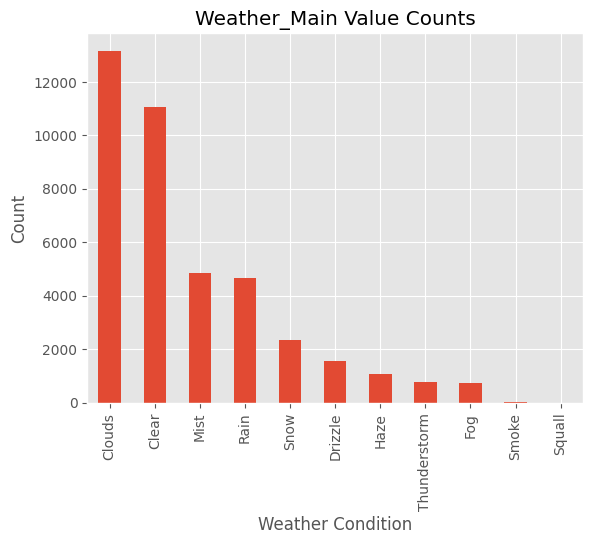

In [23]:
ax = df['Weather_Main'].value_counts() \
     .plot(kind='bar', title='Weather_Main Value Counts')
ax.set_xlabel('Weather Condition')
ax.set_ylabel('Count')

Text(0.5, 0, 'Traffic Volume')

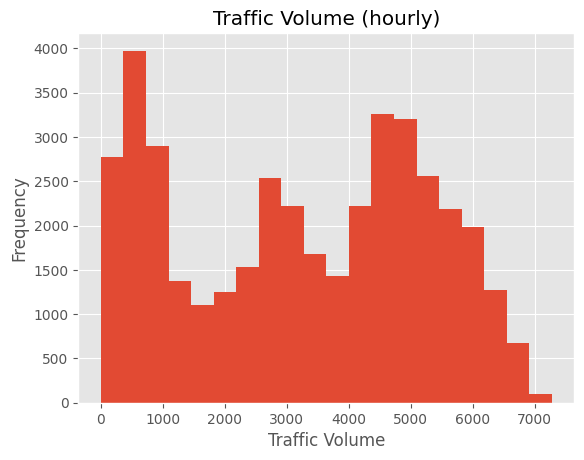

In [24]:
ax = df['Traffic_Volume'].plot(kind='hist',
                          bins=20,
                          title='Traffic Volume (hourly)')
ax.set_xlabel('Traffic Volume')

In [25]:
#Looks like a multimodal distribution, 
#it could be a consequnce of the data set being the traffic data of each hour and therefore the distribution of intra-day traffic is also captured

Text(0.5, 0, 'Traffic Volume (hourly)')

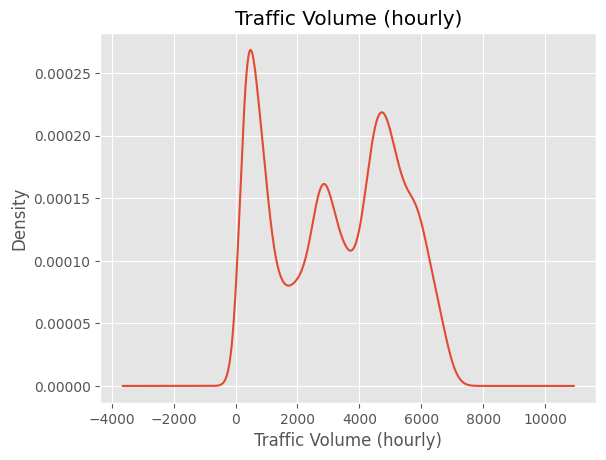

In [26]:
ax = df['Traffic_Volume'].plot(kind='kde',
                          title='Traffic Volume (hourly)')
ax.set_xlabel('Traffic Volume (hourly)')

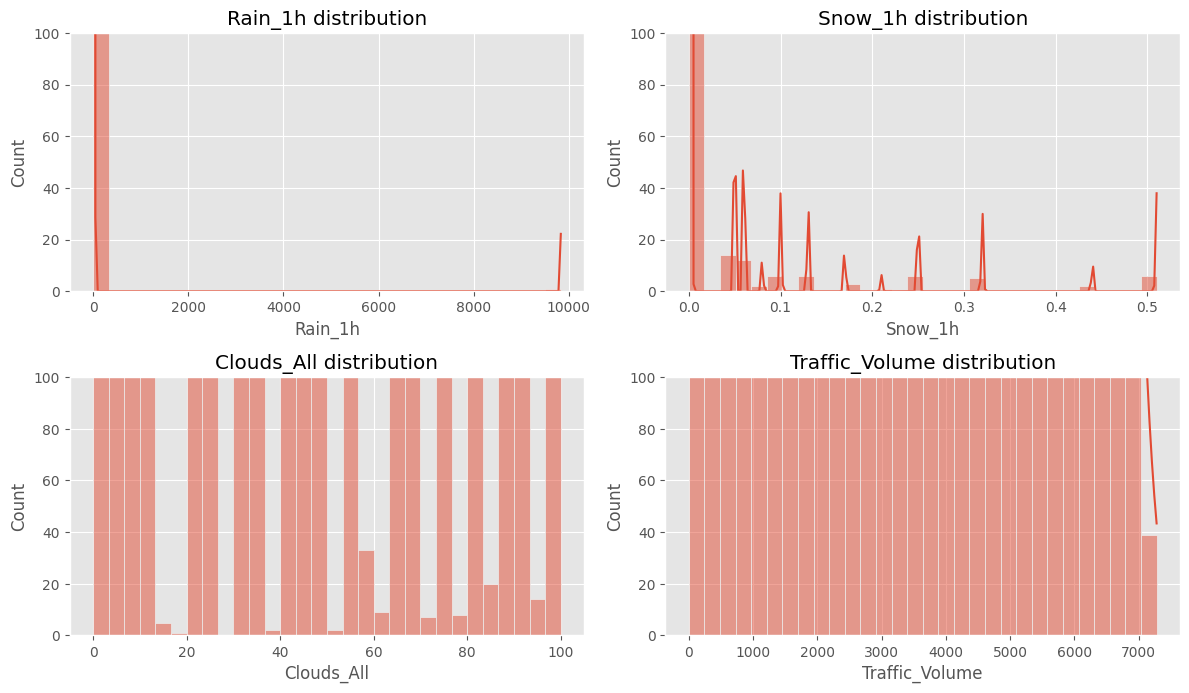

In [27]:
exp_cols = ["Rain_1h","Snow_1h","Clouds_All","Traffic_Volume"]
plt.figure(figsize=(12,10))
for i, column in enumerate(exp_cols):
    plt.subplot(3,2, i+1)
    sns.histplot(data=df, x=column, kde=True, bins=30)
    plt.title(f'{column} distribution')
    plt.ylim(0, 100)
    plt.tight_layout()

In [28]:
df.describe()

,Temp,Rain_1h,Snow_1h,Clouds_All,Date_Time,Year,Month,Day,Traffic_Volume
count,40239.000000,40239.000000,40239.000000,40239.000000,40239,40239.000000,40239.000000,40239.000000,40239.000000
mean,280.879723,0.376375,0.000266,50.116628,2015-07-18 10:31:45.345560064,2015.020627,6.787743,15.740550,3259.534382
min,0.000000,0.000000,0.000000,0.000000,2012-10-02 09:00:00,2012.000000,1.000000,1.000000,0.000000
25%,272.320000,0.000000,0.000000,1.000000,2013-11-22 16:30:00,2013.000000,4.000000,8.000000,1190.000000
50%,281.790000,0.000000,0.000000,64.000000,2015-12-21 02:00:00,2015.000000,7.000000,16.000000,3374.000000
75%,291.250000,0.000000,0.000000,90.000000,2017-01-18 11:30:00,2017.000000,10.000000,23.000000,4938.000000
max,308.240000,9831.300000,0.510000,100.000000,2017-12-31 23:00:00,2017.000000,12.000000,31.000000,7280.000000
std,13.229791,49.021159,0.008939,38.883109,NaN,1.681930,3.468748,8.719388,1989.683145


# **Step 4: Feature Relationships**

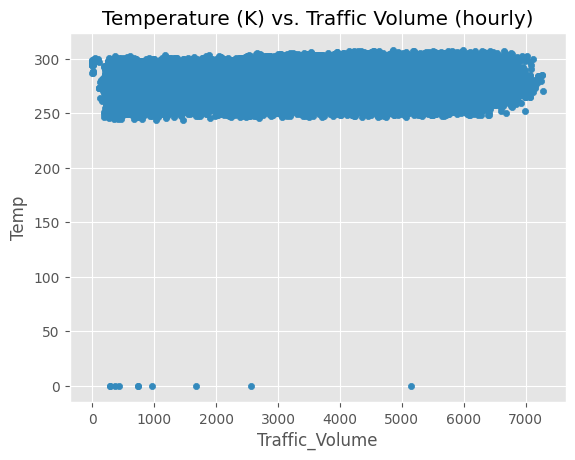

In [29]:
df.plot(kind='scatter',
        x='Traffic_Volume',
        y='Temp',
        title='Temperature (K) vs. Traffic Volume (hourly)')
plt.show()

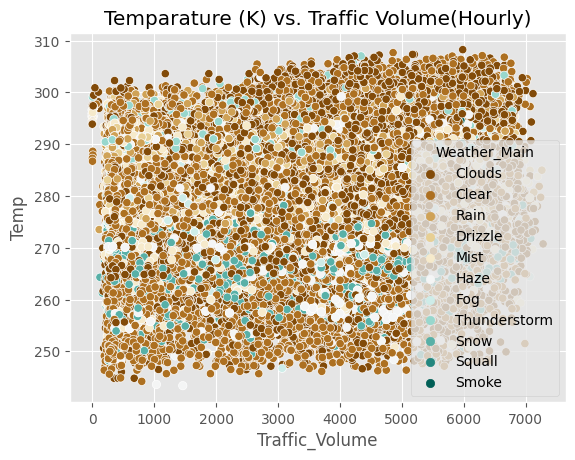

In [30]:
df_filtered = df[df['Temp'] != 0]

ax = sns.scatterplot(x='Traffic_Volume',
                y='Temp',
                hue='Weather_Main',
                palette ='BrBG',
                data=df_filtered)
ax.set_title('Temparature (K) vs. Traffic Volume(Hourly)')
plt.show()

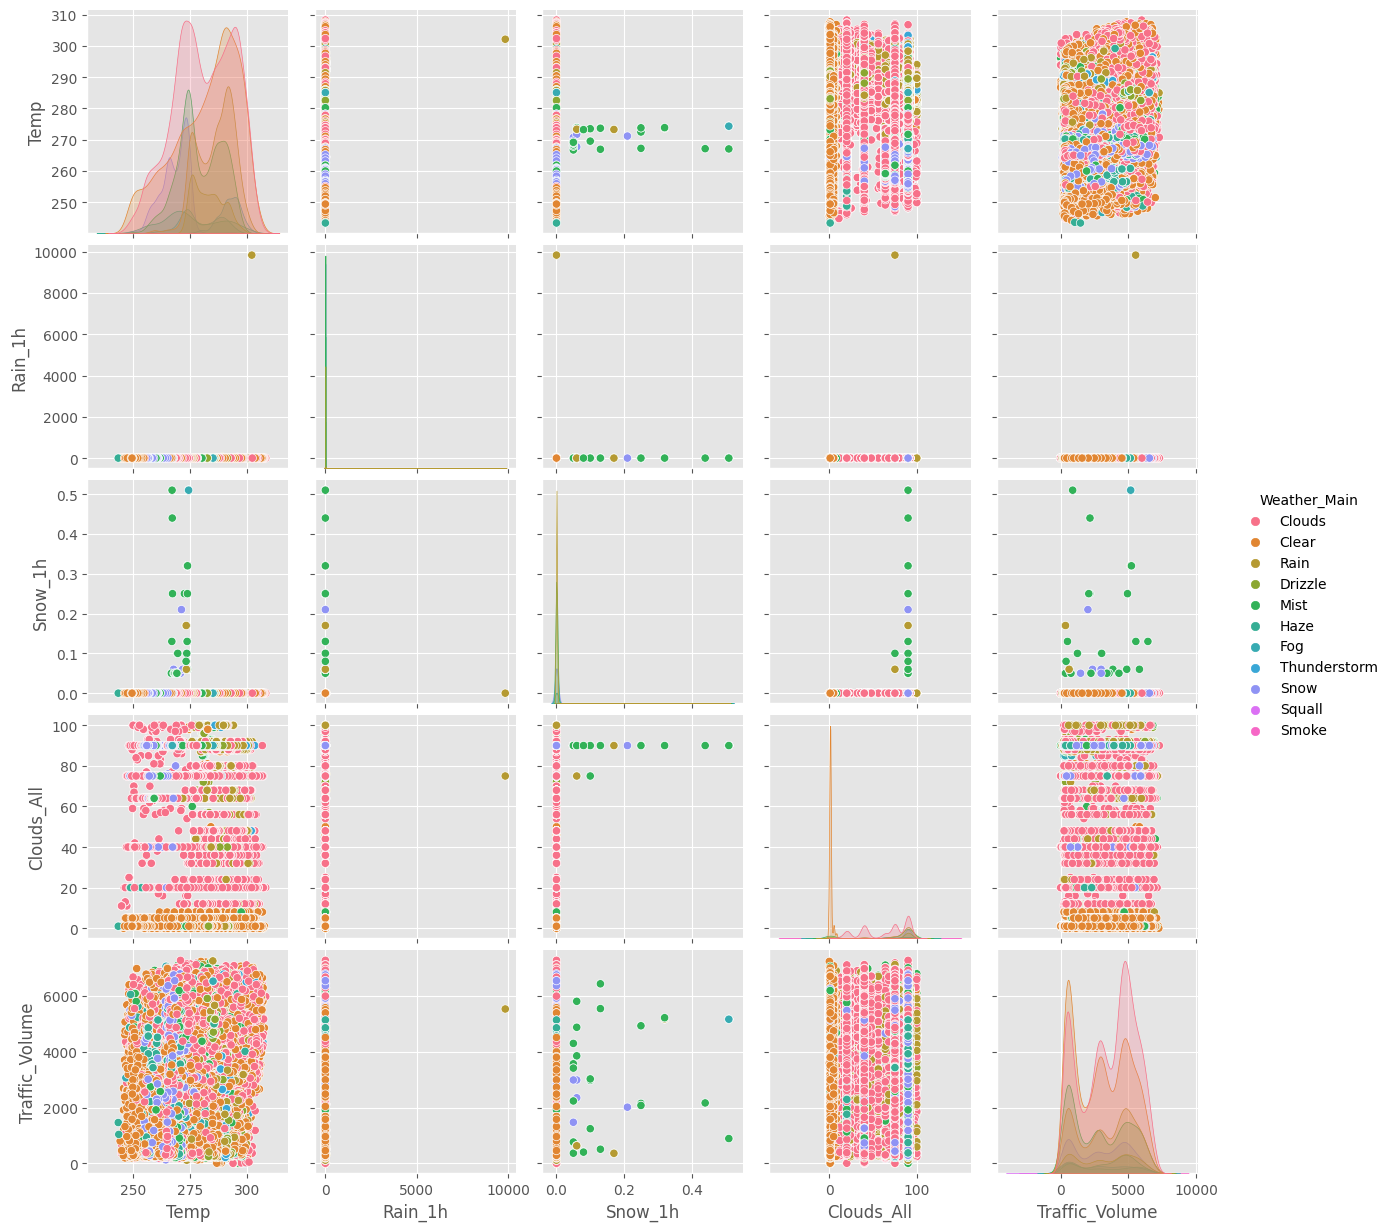

In [31]:
sns.pairplot(df_filtered,
             vars=['Temp','Rain_1h',
                   'Snow_1h','Clouds_All','Traffic_Volume'],
            hue='Weather_Main')
plt.show()


<Axes: >

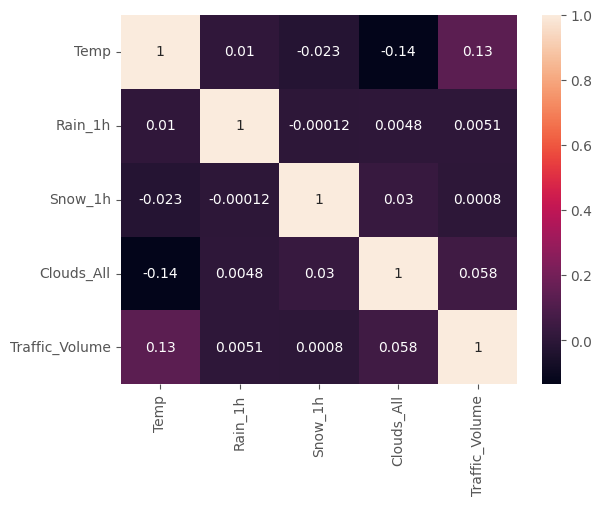

In [32]:
df_corr = df_filtered[['Temp','Rain_1h',
            'Snow_1h','Clouds_All','Traffic_Volume']].dropna().corr()
df_corr
sns.heatmap(df_corr, annot=True)

In [33]:
#it seems like both the pairplot and the .corr() analysis we could not find meaningful correlation between the numeric variables.
#Propose to perform the following:

#a) Time base Analysis


#b) Categotical Variables: e.g. boxplots


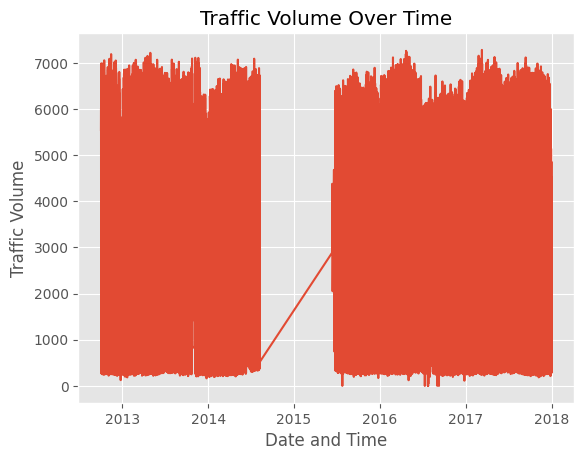

In [34]:
sns.lineplot(x='Date_Time', y='Traffic_Volume', data=df)
plt.title('Traffic Volume Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Traffic Volume')
plt.show()

In [35]:
#we see missing data for 2015

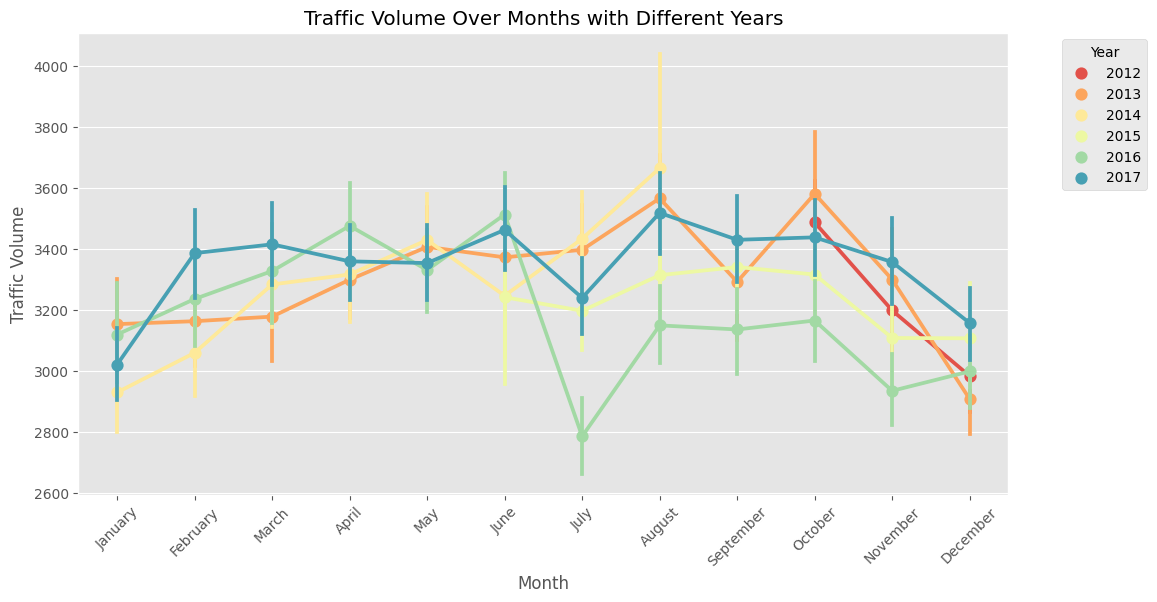

In [36]:
# Extract Year and Month from Date_Time
df['Year'] = df['Date_Time'].dt.year
df['Month'] = df['Date_Time'].dt.month_name()

# Set the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

plt.figure(figsize=(12, 6))  # Set the figure size

# Line plot with hues for different years
sns.pointplot(x='Month', y='Traffic_Volume', hue='Year', data=df, palette='Spectral')
plt.title('Traffic Volume Over Months with Different Years')
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

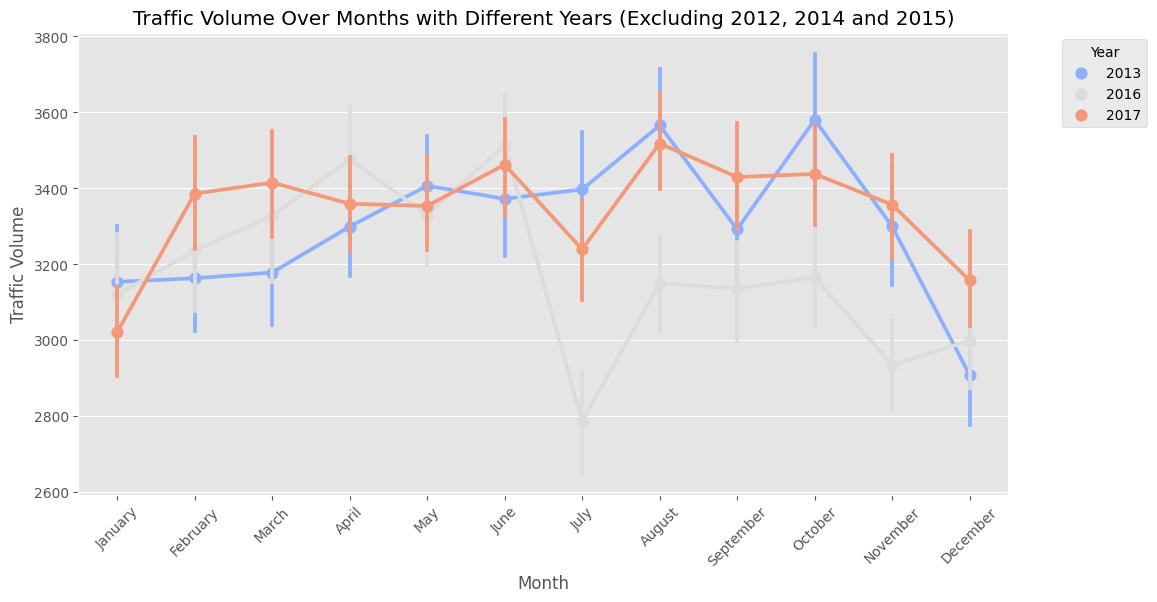

In [37]:
# Filter out data for the years 2012, 2014 and 2015
df_filtered = df[(df['Year'] != 2012) & (df['Year'] != 2014) & (df['Year'] != 2015)]

plt.figure(figsize=(12, 6))  # Set the figure size

# Line plot with hues for different years
sns.pointplot(x='Month', y='Traffic_Volume', hue='Year', data=df_filtered, palette='coolwarm')
plt.title('Traffic Volume Over Months with Different Years (Excluding 2012, 2014 and 2015)')
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# **Step 5: Ask a Question about the data**
* Why does the traffic volume for 2016 (Jul to Dec) seems to be much lower than other years?

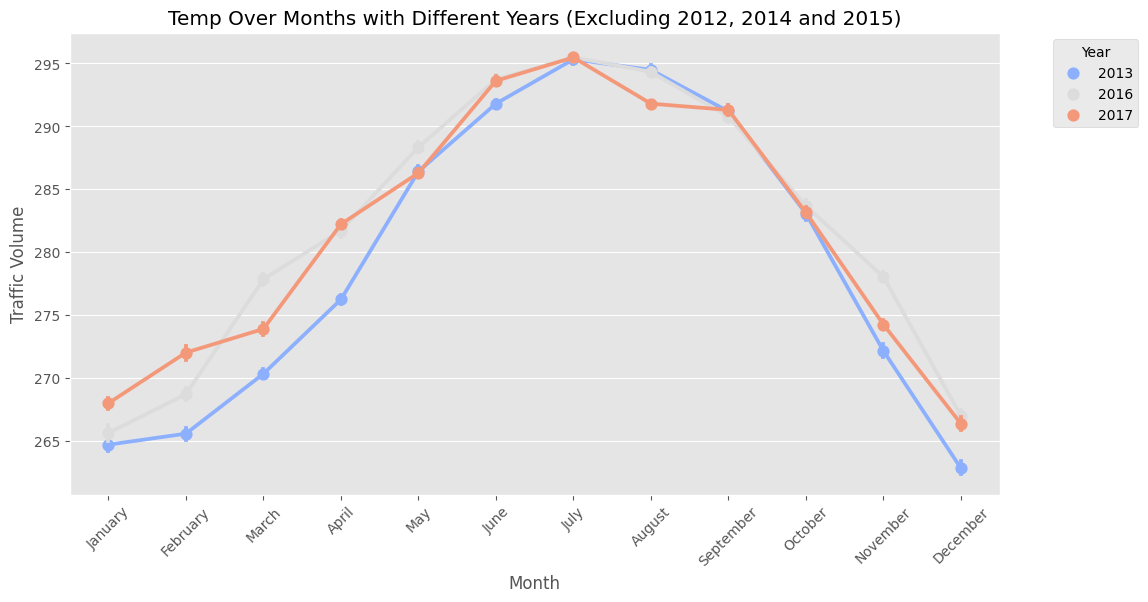

In [38]:
# Filter out data for the years 2012, 2014 and 2015
df_filtered = df[(df['Year'] != 2012) & (df['Year'] != 2014) & (df['Year'] != 2015)]

plt.figure(figsize=(12, 6))  # Set the figure size

# Line plot with hues for different years
sns.pointplot(x='Month', y='Temp', hue='Year', data=df_filtered, palette='coolwarm')
plt.title('Temp Over Months with Different Years (Excluding 2012, 2014 and 2015)')
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

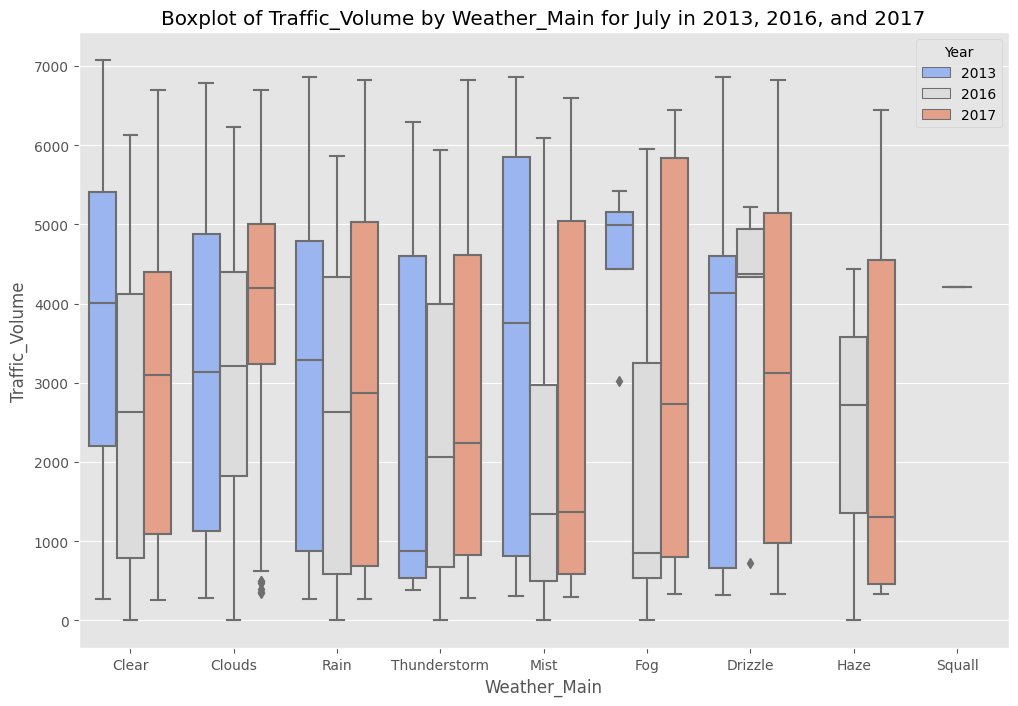

In [39]:
# Filter out data for the years 2013, 2016, and 2017 for the month of July
df_july = df[((df['Year'] == 2013) | (df['Year'] == 2016) | (df['Year'] == 2017)) & (df['Month'] == 'July')]

plt.figure(figsize=(12, 8))  # Set the figure size

# Boxplot for Traffic_Volume by Weather_Main for the month of July in 2013, 2016, and 2017
sns.boxplot(x='Weather_Main', y='Traffic_Volume', hue='Year', data=df_july, palette='coolwarm')
plt.title('Boxplot of Traffic_Volume by Weather_Main for July in 2013, 2016, and 2017')
plt.xlabel('Weather_Main')
plt.ylabel('Traffic_Volume')
plt.show()

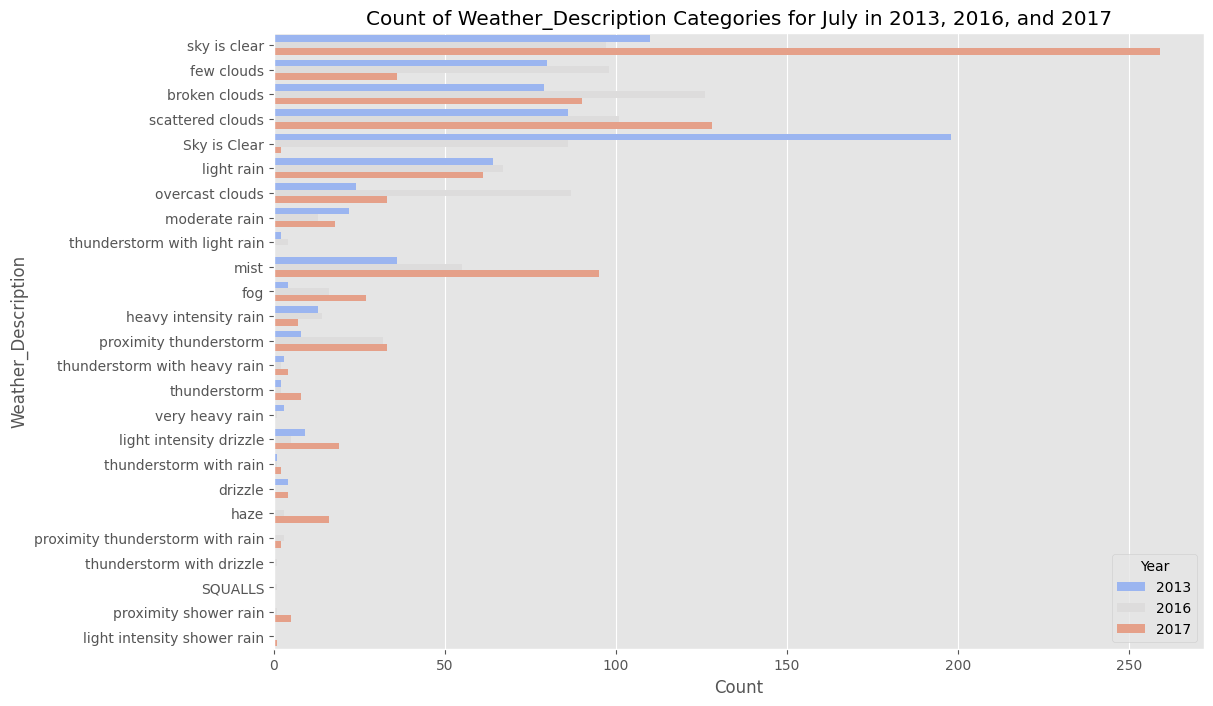

In [40]:
plt.figure(figsize=(12, 8))  # Set the figure size

# Countplot for Weather_Description for the month of July in 2013, 2016, and 2017
sns.countplot(y='Weather_Description', hue='Year', data=df_july, palette='coolwarm')
plt.title('Count of Weather_Description Categories for July in 2013, 2016, and 2017')
plt.ylabel('Weather_Description')
plt.xlabel('Count')
plt.show()

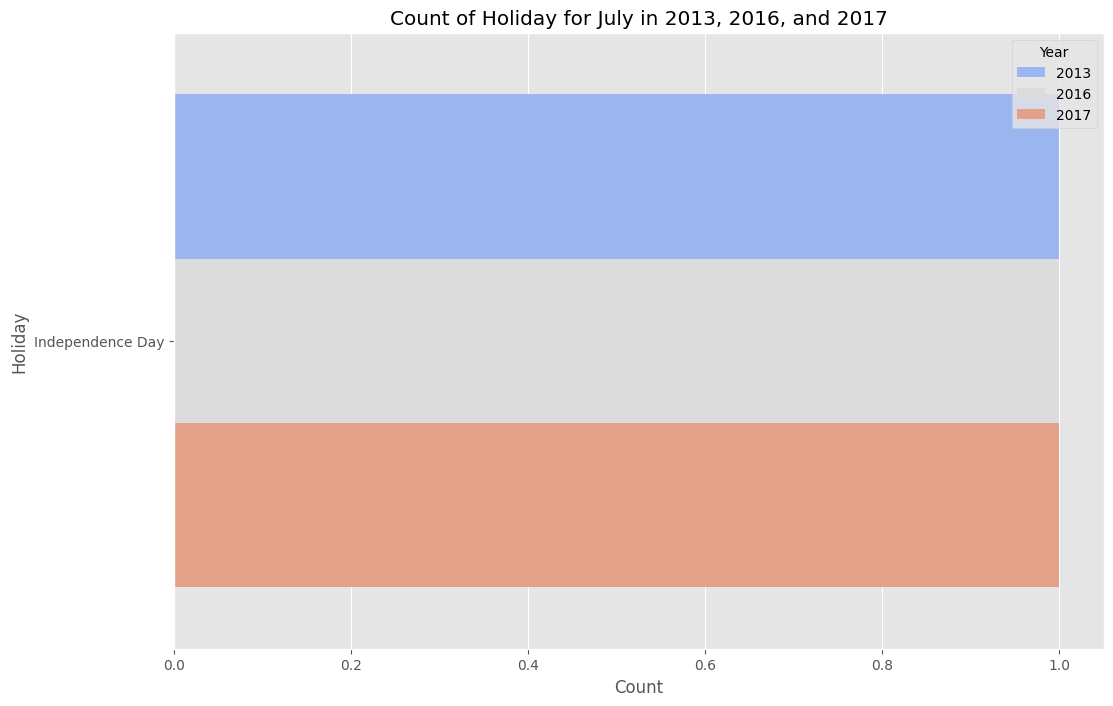

In [41]:
plt.figure(figsize=(12, 8))  # Set the figure size

# Countplot for Holiday for the month of July in 2013, 2016, and 2017
sns.countplot(y='Holiday', hue='Year', data=df_july, palette='coolwarm')
plt.title('Count of Holiday for July in 2013, 2016, and 2017')
plt.ylabel('Holiday')
plt.xlabel('Count')
plt.show()

In [42]:
df

,Holiday,Temp,Rain_1h,Snow_1h,Clouds_All,Weather_Main,Weather_Description,Date_Time,Year,Month,Day,Traffic_Volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,2012,October,2,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,2012,October,2,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,2012,October,2,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,2012,October,2,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,2012,October,2,4918
...,...,...,...,...,...,...,...,...,...,...,...,...
40234,NaN,249.84,0.0,0.0,1,Clear,sky is clear,2017-12-31 19:00:00,2017,December,31,2995
40235,NaN,249.79,0.0,0.0,5,Clear,sky is clear,2017-12-31 20:00:00,2017,December,31,2731
40236,NaN,249.61,0.0,0.0,5,Clear,sky is clear,2017-12-31 21:00:00,2017,December,31,2483
40237,NaN,249.50,0.0,0.0,1,Clear,sky is clear,2017-12-31 22:00:00,2017,December,31,2041


In [43]:
#More work needed to discover reason why for 2016 July to Dec traffic is lower than usual.